In [2]:
import pandas as pd
from statsmodels.formula.api import ols, rlm
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf
import seaborn as sns
from plotnine import *

# import data set, set directory
home_dir = "/home/tobias_giesemann/Dropbox/Uni_Master/02SS19/01Advanced_Statistical_Modelling/Essay/"

# using pandas dataframe as a similar data structure to R dataframes
miete_df = pd.read_csv(home_dir+"data/mietspiegel.csv", sep="\t")

miete_df = miete_df[miete_df.wfl <=200]

#show head
miete_df.head()

,nm,nmqm,wfl,rooms,bj,bez,wohngut,wohnbest,ww0,zh0,badkach0,badextra,kueche
0,608.4,12.67,48,2,1957.5,Untergiesing,0,0,0,0,1,0,0
1,780.0,13.00,60,2,1983.0,Bogenhausen,1,0,0,0,1,0,1
2,822.6,7.48,110,5,1957.5,Obergiesing,0,0,0,1,1,1,0
3,500.0,8.62,58,2,1957.5,SchwanthalerhÃ¶he,0,0,0,0,1,0,1
4,595.0,8.50,70,3,1972.0,Aubing...,0,0,0,0,0,0,0


                            OLS Regression Results                            
Dep. Variable:                     nm   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     4722.
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:45:58   Log-Likelihood:                -20598.
No. Observations:                3061   AIC:                         4.120e+04
Df Residuals:                    3059   BIC:                         4.121e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.0605     11.143      3.326      0.0

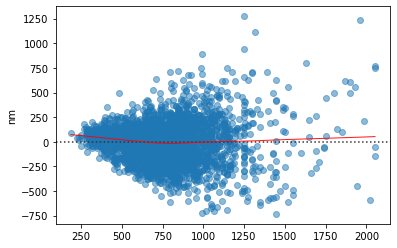

In [3]:
lm1 = ols("nm~wfl", data = miete_df).fit()
print(lm1.summary())

# let's look at the residual plot:
# fitted values (need a constant term for intercept)
model_fitted_y = lm1.fittedvalues

# residual plot
sns.residplot(x=model_fitted_y,
              y="nm", 
              data=miete_df, 
              lowess = True, 
              scatter_kws={'alpha':0.5}, 
              line_kws={"color": "red", "lw": 1, "alpha": 0.9})


In [5]:

quantile_model = smf.quantreg('nm ~ wfl', data=miete_df)
for quantile in [0.05,0.25,0.5,0.75,0.95]:
    res = quantile_model.fit(q=quantile)
    print(f"Results for {quantile}- quantile")
    print(res.summary())

Results for 0.05- quantile
                         QuantReg Regression Results                          
Dep. Variable:                     nm   Pseudo R-squared:               0.1598
Model:                       QuantReg   Bandwidth:                       51.35
Method:                 Least Squares   Sparsity:                        1600.
Date:                Wed, 07 Aug 2019   No. Observations:                 3061
Time:                        12:46:36   Df Residuals:                     3059
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.6788     16.080      2.281      0.023       5.149      68.208
wfl            5.6303      0.206     27.385      0.000       5.227       6.033
Results for 0.25- quantile
                         QuantReg Regression Results                         

/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/utils.py:54: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


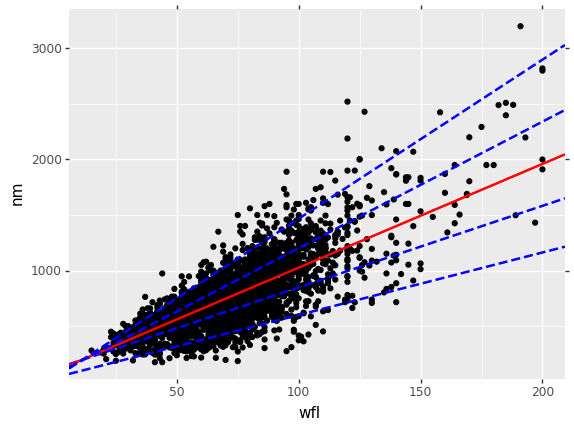

<ggplot: (-9223363265064663566)>

In [31]:
plot1 = (ggplot(data=miete_df, 
        mapping = aes(x="wfl", y = "nm"))
 + geom_point(mapping=aes())
 + geom_abline(intercept=36.6788,
             slope=5.6303,
               linetype = "dashed",
              color="blue",
              size=1)
         + geom_abline(intercept=114.0541 ,
             slope=7.3425 ,
               linetype = "dashed",
              color="blue",
              size=1)
         + geom_abline(intercept=93.3333 ,
             slope=9.3333 ,
              color="red",
              size=1)
         + geom_abline(intercept=63.8298 ,
             slope=11.3830  ,
               linetype = "dashed",
              color="blue",
              size=1)
         + geom_abline(intercept=35.0000 ,
             slope=14.3182,
               linetype = "dashed",
              color="blue",
              size=1)
)
plot1